<span style="font-size: 36px; color: yellow;">Trabalho de EDA e Modelagem de BIG DATA</span>

<span style="font-size: 18px; color: yellow;">FATESG - Professor Mestre Willgnner Ferreira</span>

<span style="font-size: 18px; color: yellow;">ALUNOS: Bruno, Jorge, Rafael, José</span>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [2]:
csv = 'house_prices.csv'
df = pd.read_csv(csv)

tamanho_csv = len(df)

In [3]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [5]:
df['location'].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [6]:
df['Status'].value_counts()

Status
Ready to Move    186916
Name: count, dtype: int64

In [7]:
df['Floor'].unique()

array(['10 out of 11', '3 out of 22', '10 out of 29', '1 out of 3',
       '20 out of 42', '2 out of 7', '4 out of 5', 'Ground out of 7',
       'Ground out of 2', '3 out of 27', '6 out of 20', '16 out of 24',
       '8 out of 20', '18 out of 27', '2 out of 3', '10 out of 16',
       '5 out of 7', '20 out of 28', '3 out of 3', '3 out of 7',
       '15 out of 31', '2 out of 28', '27 out of 27', '6 out of 7',
       '5 out of 5', '3 out of 8', '11 out of 17', '9 out of 24',
       '16 out of 27', '14 out of 29', '12 out of 27', '1 out of 27',
       '2 out of 4', '16 out of 38', '3 out of 4', '2 out of 17',
       '12 out of 28', '3 out of 19', '6 out of 28', '1 out of 4',
       '7 out of 16', '2 out of 2', '1 out of 9', '7 out of 12',
       '10 out of 10', '4 out of 4', '14 out of 17', '21 out of 27',
       '5 out of 8', '7 out of 30', '6 out of 18', '14 out of 28',
       '3 out of 5', '2 out of 24', '1 out of 8', '2 out of 16',
       '7 out of 7', '4 out of 28', '4 out of 26', '1 

In [8]:
df['Transaction'].value_counts()

Transaction
Resale          144172
New Property     42565
Other              709
Rent/Lease           2
Name: count, dtype: int64

In [9]:
df['Furnishing'].value_counts()

Furnishing
Semi-Furnished    88318
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64

In [10]:
df['facing'].value_counts()

facing
East            54741
North - East    24220
North           16533
West             8574
South            4694
North - West     3843
South - East     2622
South -West      2071
Name: count, dtype: int64

In [11]:
df['overlooking'].value_counts()

overlooking
Main Road                                      32193
Garden/Park, Main Road                         27238
Garden/Park                                    23077
Garden/Park, Pool, Main Road                   12413
Pool, Garden/Park, Main Road                    3615
Garden/Park, Pool                               2880
Main Road, Garden/Park, Pool                    1359
Pool, Main Road                                 1136
Pool                                            1012
Main Road, Garden/Park                           666
Pool, Garden/Park                                435
Garden/Park, Main Road, Pool                      39
Main Road, Pool                                   11
Main Road, Pool, Garden/Park                       8
Pool, Main Road, Garden/Park                       6
Main Road, Not Available                           4
Garden/Park, Pool, Main Road, Not Available        1
Garden/Park, Not Available                         1
Pool, Main Road, Not Available    

In [12]:
df['Society'].value_counts()

Society
Hamdam Apartment                1648
Malibu Town                     1158
Shree Vardhman Victoria         1154
DLF Skycourt                    1153
Nebula Tower                     982
                                ... 
Kamal Green Leaf                   1
TCG The Crown Greens Phase 2       1
Kingston Elysia                    1
Simran Corner                      1
Jaivee Radha Enclave               1
Name: count, Length: 10376, dtype: int64

In [13]:
df['Bathroom'].value_counts()

Bathroom
2       93007
3       55781
1       18654
4       15600
5        3343
6         209
> 10       35
7          35
10         14
8          14
9          11
Name: count, dtype: int64

In [14]:
df['Balcony'].value_counts()

Balcony
2       51809
1       49219
3       27111
4        9420
5         841
6         132
> 10       22
7          14
10         13
8          13
9           2
Name: count, dtype: int64

In [15]:
df['Car Parking'].unique()

array([nan, '1 Open', '1 Covered', '2 Covered', '66 Covered',
       '701 Covered', '3 Covered', '1 Covered,', '35 Open', '4 Open',
       '323 Covered', '4 Covered,', '11 Covered', '103 Open',
       '203 Covered', '2 Open', '180 Covered', '14 Open', '50 Open',
       '10 Covered', '15 Open', '5 Open', '7 Covered', '4 Covered',
       '509 Covered,', '6 Covered', '101 Covered', '5 Covered,',
       '6 Covered,', '3 Covered,', '123 Covered', '505 Covered',
       '402 Covered', '8 Covered', '5 Covered', '2 Covered,',
       '103 Covered', '12 Covered,', '202 Open', '202 Covered',
       '20 Covered,', '503 Open', '401 Covered', '3 Open', '501 Covered',
       '10 Covered,', '147 Covered', '20 Covered', '310 Covered',
       '204 Covered', '313 Covered', '302 Covered', '442 Covered',
       '23 Covered', '201 Covered,', '8 Open', '112 Covered',
       '14 Covered', '706 Covered', '107 Covered', '120 Covered',
       '250 Covered', '255 Covered', '11 Open', '217 Covered',
       '12 Cove

In [16]:
df['Ownership'].value_counts()

Ownership
Freehold                112229
Leasehold                 5285
Co-operative Society      3431
Power Of Attorney         1069
Name: count, dtype: int64

In [17]:
df['Super Area'].value_counts()

Super Area
1100 sqft    2599
1332 sqft    2111
1500 sqft    2018
500 sqft     1665
1000 sqft    1352
             ... 
181 sqft        1
137 sqft        1
2831 sqft       1
597 sqft        1
2332 sqft       1
Name: count, Length: 2976, dtype: int64

In [18]:
# 'Index' = Coluna guarda Index consigo, redundante
# 'Title' = Informações estão presentes em outras colunas de forma mais acessível
# 'Description' = Irrelevante sem processar texto antes
# 'Status' = Todas possuem o mesmo valor
# 'Ownership' = Muito desbalanceada
# 'Dimensions' = Coluna vazia
# 'Plot Area' = Coluna vazia

# 'location' = Coluna possui muitas categorias distintas, necessitando embedding
# 'Society' = Bastante variada e ruidosa

to_remove = ['Index', 'Title', 'Description', 'Status', 'Society', 'Ownership', 'Dimensions', 'Plot Area', 'location']
df = df.drop(columns=to_remove)

In [19]:
# Substituindo NaN por 0 nas colunas abaixo:

df['Carpet Area'] = df['Carpet Area'].fillna('0 sqm')
df['Balcony'] = df['Balcony'].fillna('0')
df['Car Parking'] = df['Car Parking'].fillna('0')
df['Super Area'] = df['Super Area'].fillna('0 sqm')

In [20]:
# Verifica unidade de medidas da coluna abaixo

palavras = df['Carpet Area'].astype(str).apply(lambda x: re.findall(r'[A-Za-z]+', x))
unicas = set([p.lower() for lista in palavras for p in lista])
unidades_carpet = list(unicas)
print(unidades_carpet)

['cent', 'sqyrd', 'ground', 'sqft', 'sqm', 'acre', 'bigha', 'kanal', 'marla']


In [21]:
# Verifica unidade de medidas da coluna abaixo

palavras = df['Super Area'].astype(str).apply(lambda x: re.findall(r'[A-Za-z]+', x))
unicas = set([p.lower() for lista in palavras for p in lista])
unidades_super = list(unicas)
print(unidades_super)

['cent', 'biswa', 'hectare', 'sqyrd', 'aankadam', 'sqft', 'ground', 'sqm', 'acre', 'kanal', 'marla']


In [22]:
# dicionário para converter unidades para SQM (Square Meters / Metros Quadrados)

sqft_converter = {
    'sqft' : 0.092903,
    'cent': 40.47,
    'sqm': 1.0,
    'acre': 4046.86,
    'ground': 223.0,
    'hectare': 10000.0,
    'bigha': 2529.0,
    'biswa': 125.42,
    'marla': 25.2929,
    'sqyrd': 0.8361,
    'kanal': 505.857,
    'aankadam': 6.69
}

# Função para aplicar dicionário nos valores das colunas

def converter_sqm(valor):
    if pd.isna(valor):
        return np.nan

    texto = str(valor).lower().strip()

    # Extrair número (permite decimal)
    numeros = re.findall(r"[\d\.]+", texto)
    if not numeros:
        return np.nan
    numero = float(numeros[0])

    # Extrair todas as sequências de letras (palavras)
    palavras = re.findall(r"[a-z]+", texto)

    # Tentar encontrar alguma unidade presente nas palavras
    for palavra in palavras:
        for unidade in sqft_converter:
            # se a unidade estiver contida na palavra (ex: "acres" → "acre")
            if unidade in palavra:
                return numero * sqft_converter[unidade]

    # Nenhuma unidade reconhecida
    return np.nan


# Aplica nas colunas
df['Carpet Area'] = df['Carpet Area'].apply(converter_sqm).astype(float)
df['Super Area'] = df['Super Area'].apply(converter_sqm).astype(float)

In [23]:
# Convertendo facing para numérica com método semelhante

facing_converter = {
    'North': 0.0,
    'North - West': 0.125,
    'West': 0.25,
    'South - West': 0.375,
    'South': 0.5,
    'South -East': 0.625,
    'East': 0.75,
    'North - East': 0.875
}

def converter_facing(valor):
    if pd.isna(valor):
        return np.nan

    texto = str(valor)

    for orientacao in facing_converter:
        if orientacao == texto:
            return facing_converter[orientacao]
    return np.nan

df['facing'] = df['facing'].apply(converter_facing).astype(float)

In [24]:
# Convertendo Transaction para numérica com método semelhante
# Usaremos apenas os valores Resale e New Property como 0 e 1, respectivamente

def converter_transaction(valor):
    if pd.isna(valor):
        return np.nan

    texto = str(valor)

    if texto == 'Resale':
        return 0.0
    if texto == 'New Property':
        return 1.0

    return np.nan

df['Transaction'] = df['Transaction'].apply(converter_transaction).astype(float)

In [25]:
# dicionário para converter Car Parking
# simplificaremos a informação para 0 = sem estacionamento, 0.5 = aberto, e 1 = coberto

parking_converter = {
    'covered' : 1.0,
    'open': 0.5
}

def converter_parking(valor):

    texto = str(valor).lower().strip()
    palavras = re.findall(r"[a-z]+", texto)

    for palavra in palavras:
        for park in parking_converter:
            if park in palavra:
                return parking_converter[park]

    return 0.0

df['Car Parking'] = df['Car Parking'].apply(converter_parking).astype(float)

In [26]:
# De forma semelhante, tratamos a coluna 'Furnishing'

furnishing_converter = {
    'Unfurnished': 0.0,
    'Semi-Furnished': 0.5,
    'Furnished': 1.0
}

def converter_furnishing(valor):

    texto = str(valor)

    for key in furnishing_converter.keys():
        if key == texto:
            return furnishing_converter[key]

df['Furnishing'] = df['Furnishing'].apply(converter_furnishing).astype(float)

In [27]:
# fazendo encoding da coluna 'overlooking'

def parse_overlooking(value):
    if pd.isna(value):
        return pd.Series([0, 0, 0])

    palavras = [x.strip() for x in str(value).split(',')]

    return pd.Series([
        int('Main Road' in palavras),
        int('Garden/Park' in palavras),
        int('Pool' in palavras)
    ])

df[['main_road', 'garden_park', 'pool']] = df['overlooking'].apply(parse_overlooking)

df = df.drop(columns=['overlooking'])

In [28]:
# Verifica unidade de medidas da coluna abaixo

palavras = df['Amount(in rupees)'].astype(str).apply(lambda x: re.findall(r'[A-Za-z]+', x))
unicas = set([p.lower() for lista in palavras for p in lista])
unidades_amount = list(unicas)
print(unidades_amount)

['for', 'cr', 'call', 'price', 'lac']


In [29]:
# a coluna Amount informa o valor total do imóvel
# enquanto a coluna Price informa o preço de aluguel
# no mercado imobiliário da índia, grandes valores são abreviados usando essas unidades de medida:
# 1 lac (ou lakh) = 100.000 rupias indianas (INR)
# 1 crore = 10.000.000 rupias indianas (INR)
# preços não informados recebem 'call for price' (pergunte o preço)
# diante disso, converteremos tudo para rupias indianas ou np.nan

amount_converter = {
    'lac' : 100000.0,
    'cr': 10000000.0
}

def converter_amount(valor):
    if pd.isna(valor):
        return np.nan

    texto = str(valor).lower().strip()

    numeros = re.findall(r"[\d\.]+", texto)
    if not numeros:
        return np.nan
    numero = float(numeros[0])

    palavras = re.findall(r"[a-z]+", texto)

    for palavra in palavras:
        for unidade in amount_converter:
            if unidade in palavra:
                return numero * amount_converter[unidade]

    return np.nan

df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(converter_amount).astype(float)

In [30]:
# Tratando a coluna floor

def parse_floor(text):
    if pd.isna(text):
        return pd.Series([np.nan, np.nan])

    text = str(text).strip()

    # Casos especiais
    mapping = {
        "ground": 0,
        "upper basement": -1,
        "lower basement": -2
    }

    # normaliza
    norm = text.lower()

    # Caso seja algo como "Ground"
    if norm in mapping:
        return pd.Series([mapping[norm], np.nan])

    # Caso seja algo como "Ground out of 7"
    for key, value in mapping.items():
        if norm.startswith(key):
            # extrai o número total
            m = re.search(r"out of (\d+)", norm)
            total = int(m.group(1)) if m else np.nan
            return pd.Series([value, total])

    # Caso geral: "10 out of 11"
    m = re.match(r"(\d+)\s*out of\s*(\d+)", norm)
    if m:
        return pd.Series([int(m.group(1)), int(m.group(2))])

    # Caso seja só um número ("4", "2", etc.)
    if norm.isdigit():
        return pd.Series([int(norm), np.nan])

    # Se nada bate
    return pd.Series([np.nan, np.nan])

df[['Floor', 'Total_Floors']] = df['Floor'].apply(parse_floor)
df['Floor'] = df['Floor']/df['Total_Floors'] # converte em uma porcentagem do total de andares

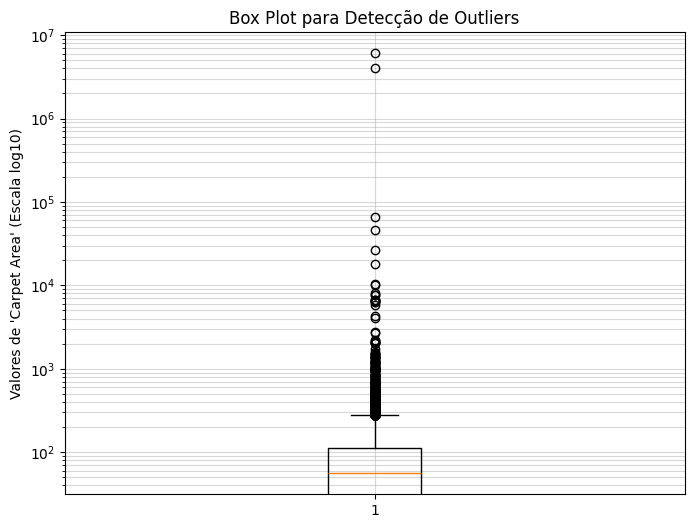

In [31]:
# boxplot para visualizar distribuição e ouliers de 'Carpet Area'

df['Carpet Area'] = df['Carpet Area'].astype(float)

plt.figure(figsize=(8, 6))
plt.boxplot(df['Carpet Area'])
plt.yscale('log')
plt.title('Box Plot para Detecção de Outliers')
plt.ylabel("Valores de 'Carpet Area' (Escala log10)")
plt.grid(True, which="both", ls="-", alpha=0.5) 
plt.show()

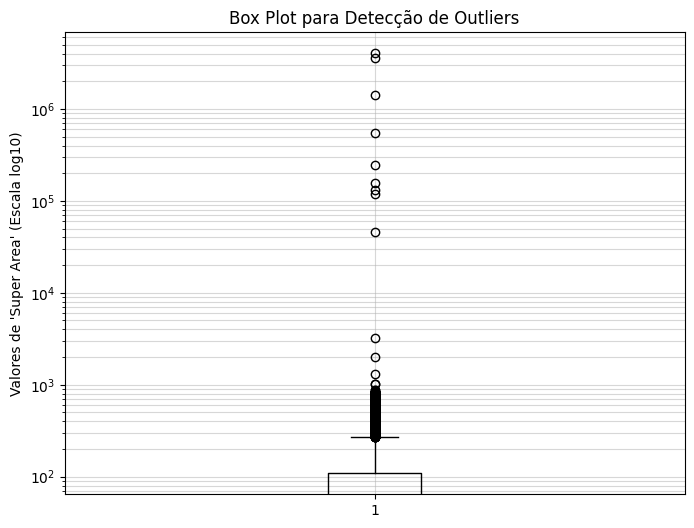

In [32]:
# boxplot para visualizar distribuição e ouliers de 'Super Area'

df['Super Area'] = df['Super Area'].astype(float)

plt.figure(figsize=(8, 6))
plt.boxplot(df['Super Area'])
plt.yscale('log')
plt.title('Box Plot para Detecção de Outliers')
plt.ylabel("Valores de 'Super Area' (Escala log10)")
plt.grid(True, which="both", ls="-", alpha=0.5) 
plt.show()

In [33]:
def remove_outliers(df, col):

    # --- Passo 1: Calcular Q1, Q3 e IQR ---
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # --- Passo 2: Definir o Limite do Outlier ---
    Limite_Superior = Q3 + 1.5 * IQR

    # Identifica os valores que estão acima do Limite Superior
    condicao_outlier = (df[col] > Limite_Superior)

    # Aplica a substituição, trocando esses valores por NaN
    df.loc[condicao_outlier, col] = np.nan

    return df

df = remove_outliers(df, 'Carpet Area')
df = remove_outliers(df, 'Super Area')

In [34]:
# escalando 'Carpet Area' , 'Super Area' e 'Total_Floors' com min-max scaler:

df['Carpet Area'] = df['Carpet Area'] / df['Carpet Area'].max()
df['Super Area'] = df['Super Area'] / df['Super Area'].max()
df['Total_Floors'] = df['Total_Floors'] / df['Total_Floors'].max()

In [35]:
# Escalando Bathroom (Banheiros) usando 1, 2, 3, 4 e 5+

bathroom_converter = {
    '1': 0.2,
    '2': 0.4,
    '3': 0.6,
    '4': 0.8,
    '5': 1.0,
    '6': 1.0,
    '7': 1.0,
    '8': 1.0,
    '9': 1.0,
    '10': 1.0,
    '> 10': 1.0
}

def converter_bathroom(valor):

    texto = str(valor)

    for key in bathroom_converter.keys():
        if key == texto:
            return bathroom_converter[key]

df['Bathroom'] = df['Bathroom'].apply(converter_bathroom).astype(float)

In [36]:
# Escalando Balcony (Varandas) usando 1, 2, 3, 4 e 5+

balcony_converter = {
    '0': 0.0,
    '1': 0.2,
    '2': 0.4,
    '3': 0.6,
    '4': 0.8,
    '5': 1.0,
    '6': 1.0,
    '7': 1.0,
    '8': 1.0,
    '9': 1.0,
    '10': 1.0,
    '> 10': 1.0
}

def converter_bathroom(valor):

    texto = str(valor)

    for key in balcony_converter.keys():
        if key == texto:
            return balcony_converter[key]

df['Balcony'] = df['Balcony'].apply(converter_bathroom).astype(float)

In [37]:
df = df.dropna().reset_index(drop=True)
df

,Amount(in rupees),Price (in rupees),Carpet Area,Floor,Transaction,Furnishing,facing,Bathroom,Balcony,Car Parking,Super Area,main_road,garden_park,pool,Total_Floors
0,9800000.0,13799.0,0.158194,0.136364,0.0,0.5,0.750,0.4,0.0,0.5,0.000000,0,1,0,0.110
1,14000000.0,17500.0,0.260535,0.344828,0.0,0.0,0.750,0.4,0.0,1.0,0.000000,0,1,0,0.145
2,16000000.0,18824.0,0.212375,0.476190,0.0,0.0,0.250,0.4,0.0,1.0,0.000000,1,1,0,0.210
3,4500000.0,6618.0,0.000000,0.285714,0.0,0.0,0.750,0.2,0.2,0.0,0.232479,1,1,0,0.035
4,16000000.0,11150.0,0.301003,0.111111,0.0,0.0,0.750,0.6,0.2,1.0,0.000000,0,1,0,0.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98692,4490000.0,3904.0,0.351171,0.333333,1.0,0.0,0.875,0.6,0.4,0.0,0.000000,1,1,0,0.015
98693,6300000.0,3225.0,0.000000,0.500000,1.0,0.5,0.750,0.6,0.6,1.0,0.667692,0,1,0,0.020
98694,5500000.0,3274.0,0.000000,0.666667,0.0,0.0,0.875,0.6,0.0,1.0,0.574359,1,1,0,0.030
98695,7600000.0,4343.0,0.418060,0.333333,0.0,1.0,0.750,0.6,0.4,1.0,0.000000,1,1,0,0.015


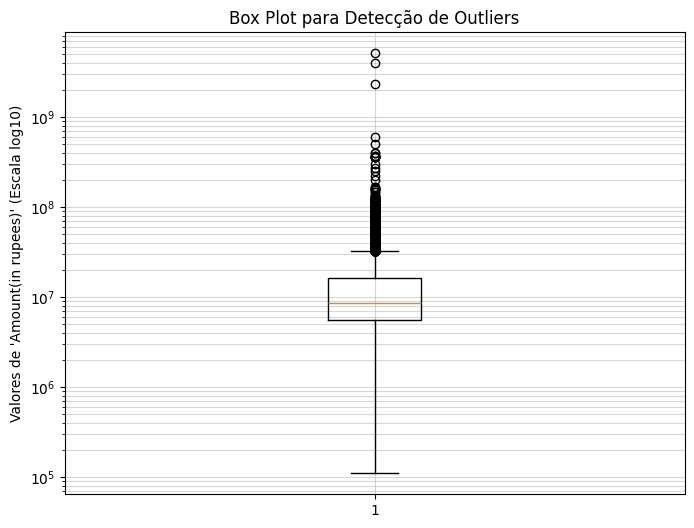

In [38]:
# boxplot para visualizar distribuição e ouliers de 'Amount(in rupees)'

df['Amount(in rupees)'] = df['Amount(in rupees)'].astype(float)

plt.figure(figsize=(8, 6))
plt.boxplot(df['Amount(in rupees)'])
plt.yscale('log')
plt.title('Box Plot para Detecção de Outliers')
plt.ylabel("Valores de 'Amount(in rupees)' (Escala log10)")
plt.grid(True, which="both", ls="-", alpha=0.5) 
plt.show()

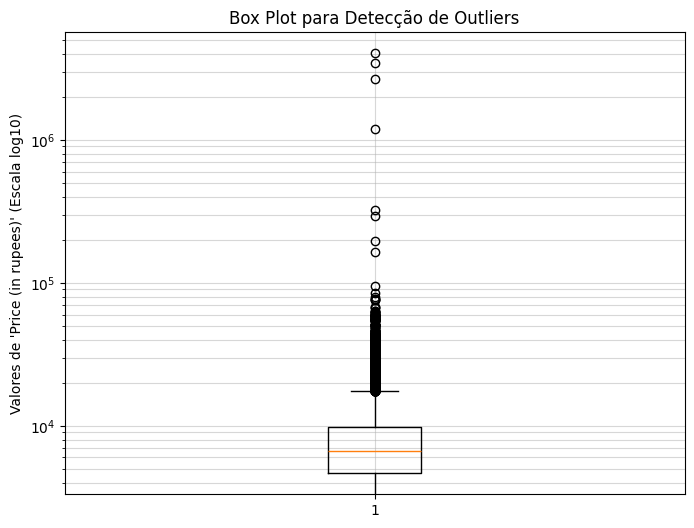

In [39]:
# boxplot para visualizar distribuição e ouliers de 'Price (in rupees)'

df['Price (in rupees)'] = df['Price (in rupees)'].astype(float)

plt.figure(figsize=(8, 6))
plt.boxplot(df['Price (in rupees)'])
plt.yscale('log')
plt.title('Box Plot para Detecção de Outliers')
plt.ylabel("Valores de 'Price (in rupees)' (Escala log10)")
plt.grid(True, which="both", ls="-", alpha=0.5) 
plt.show()

In [40]:
# Removendo ouliers das colunas-alvo

df = remove_outliers(df, 'Amount(in rupees)')
df = remove_outliers(df, 'Price (in rupees)')

df = df.dropna().reset_index(drop=True)

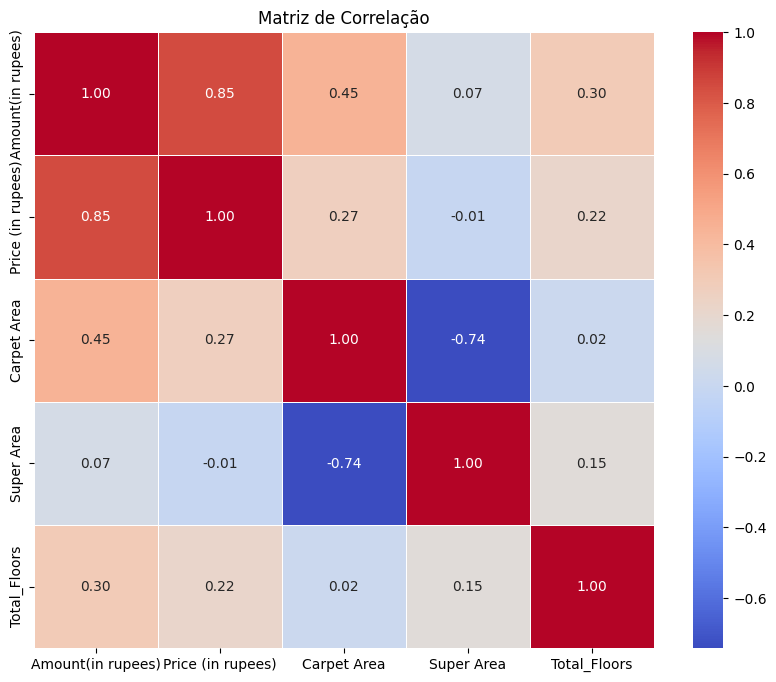

In [41]:
# Plotando matriz de correlação entre variáveis-alvo e variáveis numéricas

colunas_para_correlacao = ['Amount(in rupees)', 'Price (in rupees)', 'Carpet Area', 'Super Area', 'Total_Floors']

matriz_correlacao = df[colunas_para_correlacao].corr()


plt.figure(figsize=(10, 8)) # Define o tamanho do gráfico para melhor leitura
sns.heatmap(
    matriz_correlacao,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar=True
)

plt.title('Matriz de Correlação')
plt.show()

In [42]:
print(f'O csv original contém {tamanho_csv} linhas.')
print(f'O dataframe após tratamento e trasmormação nos dados, serão usadas {len(df)} linhas, {100 * len(df)/tamanho_csv:.2f} %.')

O csv original contém 187531 linhas.
O dataframe após tratamento e trasmormação nos dados, serão usadas 93418 linhas, 49.81 %.


In [43]:
FEATURES = ['Carpet Area', 'Floor', 'Transaction', 'Furnishing', 'facing', 'Bathroom', 'Balcony', 'Car Parking', 'Super Area',
            'main_road', 'garden_park', 'pool', 'Total_Floors']

GOALS = ['Amount(in rupees)', 'Price (in rupees)']

# 1. Separar as features (X) dos alvos (y)
X = df[FEATURES]
y = df[GOALS] 

# 2. Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42 # Para reprodutibilidade
)

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

In [44]:
class DataGenerator(Sequence):

    def __init__(self, X_data, y_data, batch_size=32, shuffle=True):
        """
        Inicialização
        :param X_data: Dados de entrada (Features).
        :param y_data: Dados de saída (Alvos).
        :param batch_size: Tamanho do batch.
        :param shuffle: Se deve embaralhar os dados a cada época.
        """
        self.X = X_data
        self.y = y_data
        
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.X))
        
        # Chama o método para embaralhar os dados na primeira vez
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        """
        Gera um batch de dados (X e y) no índice especificado.
        """
        start_index = index * self.batch_size
        end_index = (index + 1) * self.batch_size
        batch_indices = self.indices[start_index:end_index]

        X_batch = self.X[batch_indices]
        y_batch = self.y[batch_indices]

        return X_batch, y_batch

    def on_epoch_end(self):
        """
        Embaralha os índices para obter uma ordem diferente na próxima época
        """
        if self.shuffle:
            np.random.shuffle(self.indices)

BATCH_SIZE = 32

train_generator = DataGenerator(
    X_data=X_train_np, 
    y_data=y_train_np, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

validation_generator = DataGenerator(
    X_data=X_test_np, 
    y_data=y_test_np, 
    batch_size=BATCH_SIZE, 
    shuffle=False
)

print(f"Número de batches de treino: {len(train_generator)}")
print(f"Número de batches de validação: {len(validation_generator)}")

Número de batches de treino: 2335
Número de batches de validação: 583


In [45]:
# --- Parâmetros de Decaimento Exponencial ---

INITIAL_LEARNING_RATE = 0.01

STEPS_PER_EPOCH = len(train_generator)
DECAY_STEPS = STEPS_PER_EPOCH

DECAY_RATE = 0.95


lr_schedule = ExponentialDecay(
    initial_learning_rate=INITIAL_LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=DECAY_RATE,
    staircase=False # Define se o decaimento é discreto (passos) ou contínuo
)

In [46]:
# 1. Definir o modelo sequencial
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(len(FEATURES),))) 
model.add(Dropout(0.2)) 

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(len(GOALS))) 

model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [47]:
# Treinar o modelo
print("\nIniciando o treinamento do modelo...")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,  # Número de épocas, ajuste conforme necessário
    verbose=1   # 1 para barra de progresso, 0 para silenciar
)


Iniciando o treinamento do modelo...
Epoch 1/15
2335/2335 [==============================] - 25s 10ms/step - loss: 14206632984576.0000 - mae: 1909425.3750 - val_loss: 6846988943360.0000 - val_mae: 1289672.6250
Epoch 2/15
2335/2335 [==============================] - 24s 10ms/step - loss: 10975071698944.0000 - mae: 1658294.7500 - val_loss: 6615936794624.0000 - val_mae: 1266974.2500
Epoch 3/15
2335/2335 [==============================] - 24s 10ms/step - loss: 10309800558592.0000 - mae: 1599153.1250 - val_loss: 4938333159424.0000 - val_mae: 1015053.9375
Epoch 4/15
2335/2335 [==============================] - 24s 10ms/step - loss: 9457101701120.0000 - mae: 1531789.3750 - val_loss: 4641579859968.0000 - val_mae: 1000011.5000
Epoch 5/15
2335/2335 [==============================] - 24s 10ms/step - loss: 9143431725056.0000 - mae: 1504065.0000 - val_loss: 4822162472960.0000 - val_mae: 1037727.6250
Epoch 6/15
2335/2335 [==============================] - 25s 10ms/step - loss: 8945626251264.0000 - 

In [48]:
# Avaliar o modelo no conjunto de validação
print("\nAvaliando o modelo no conjunto de validação...")
loss, mae = model.evaluate(validation_generator, verbose=0)
print(f"Perda (MSE) no conjunto de validação: {loss:.4f}")
print(f"Erro Absoluto Médio (MAE) no conjunto de validação: {mae:.4f}")
print(f"Porcentagem do MAE em relação conjunto de validação: {100 * mae / y_test_np.mean():.4f}%")

# Fazer previsões
print("\nFazendo previsões em algumas amostras de teste...")
sample_predictions = model.predict(X_test_np[:10]) # Prever nas primeiras 5 amostras de teste
print("Previsões para as primeiras 10 amostras:")
print(sample_predictions)
print("\nValores reais para as primeiras 10 amostras:")
print(y_test_np[:10])


Avaliando o modelo no conjunto de validação...
Perda (MSE) no conjunto de validação: 4307615481856.0000
Erro Absoluto Médio (MAE) no conjunto de validação: 957760.7500
Porcentagem do MAE em relação conjunto de validação: 17.6039%

Fazendo previsões em algumas amostras de teste...
1/1 [==============================] - 0s 203ms/step
Previsões para as primeiras 10 amostras:
[[1.0751173e+07 5.7648159e+03]
 [6.5946905e+06 3.5461421e+03]
 [1.2943373e+07 6.9349702e+03]
 [1.7146162e+07 9.1783389e+03]
 [9.0493670e+06 4.8564399e+03]
 [7.1381950e+06 3.8362930e+03]
 [2.7533686e+07 1.4722977e+04]
 [1.1549482e+07 6.1909268e+03]
 [1.0281429e+07 5.5140522e+03]
 [4.8914430e+06 2.6370005e+03]]

Valores reais para as primeiras 10 amostras:
[[1.0500e+07 6.8630e+03]
 [6.9000e+06 5.1690e+03]
 [1.6300e+07 8.3590e+03]
 [1.8900e+07 1.0500e+04]
 [1.0000e+07 6.6890e+03]
 [8.5000e+06 7.2960e+03]
 [3.1000e+07 1.3108e+04]
 [5.0000e+06 2.9410e+03]
 [1.3000e+07 8.6800e+03]
 [8.0000e+06 9.0910e+03]]


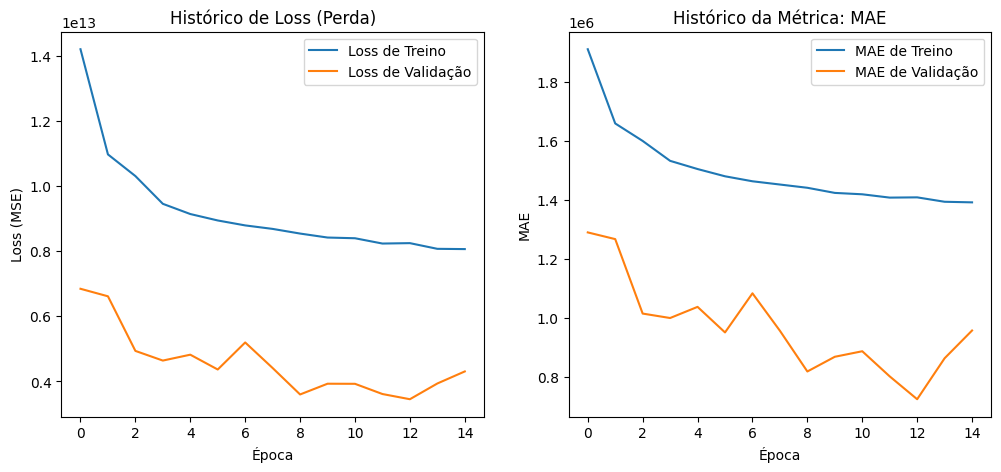

In [49]:
metric_name = 'mae'

# 1. Plotar o Loss (Perda)
plt.figure(figsize=(12, 5))
    
# Gráfico 1: Loss
plt.subplot(1, 2, 1) # Cria o primeiro subplot (1 linha, 2 colunas, posição 1)
plt.plot(history.history['loss'], label='Loss de Treino')
    
# O Keras prefixa métricas de validação com 'val_'
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    
plt.title('Histórico de Loss (Perda)')
plt.ylabel('Loss (MSE)') # Ajuste o label se usou outra função de perda
plt.xlabel('Época')
plt.legend()

# 2. Plotar a Métrica
plt.subplot(1, 2, 2) # Cria o segundo subplot (1 linha, 2 colunas, posição 2)
    
plt.plot(history.history[metric_name], label=f'{metric_name.upper()} de Treino')
    
val_metric_name = f'val_{metric_name}'
if val_metric_name in history.history:
    plt.plot(history.history[val_metric_name], label=f'{metric_name.upper()} de Validação')
        
plt.title(f'Histórico da Métrica: {metric_name.upper()}')
plt.ylabel(f'{metric_name.upper()}')
plt.xlabel('Época')
plt.legend()
    
plt.show()

584/584 [==============================] - 1s 2ms/step


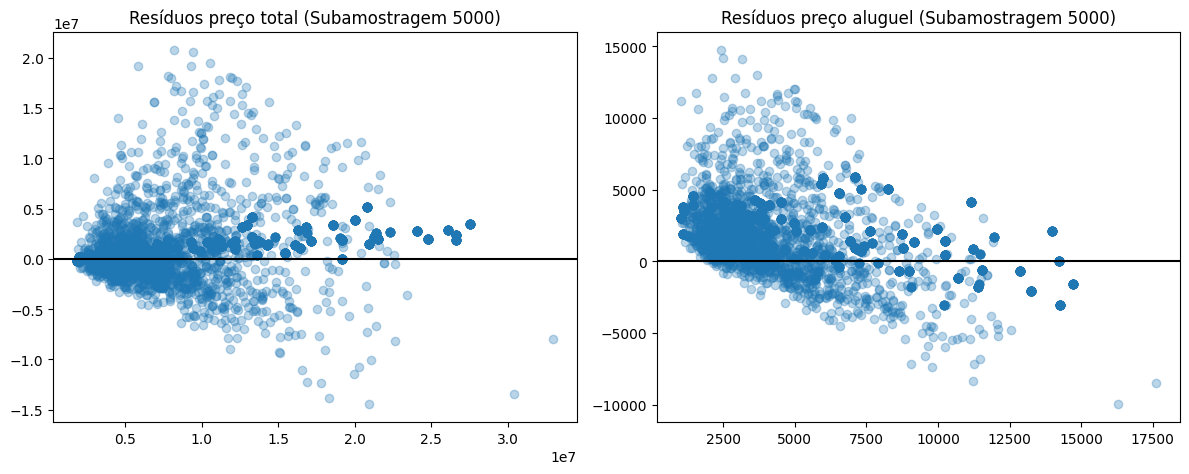

In [50]:
# 

predictions = model.predict(X_test_np)

res1 = y_test_np[:,0] - predictions[:,0]
res2 = y_test_np[:,1] - predictions[:,1]

N = 5000
idx = np.random.choice(len(predictions), size=N, replace=False)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(predictions[idx,0], res1[idx], alpha=0.3)
plt.axhline(0, color='black')
plt.title(f"Resíduos preço total (Subamostragem {N})")

plt.subplot(1,2,2)
plt.scatter(predictions[idx,1], res2[idx], alpha=0.3)
plt.axhline(0, color='black')
plt.title(f"Resíduos preço aluguel (Subamostragem {N})")

plt.tight_layout()
plt.show()

In [51]:
FEATURES = ['Carpet Area', 'Floor', 'Transaction', 'Furnishing', 'facing', 'Bathroom', 'Balcony', 'Car Parking', 'Super Area',
            'main_road', 'garden_park', 'pool', 'Total_Floors']

GOALS = ['Amount(in rupees)']

# 1. Separar as features (X) dos alvos (y)
X = df[FEATURES]
y = df[GOALS] 

# 2. Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42 # Para reprodutibilidade
)

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

BATCH_SIZE = 32

train_generator = DataGenerator(
    X_data=X_train_np, 
    y_data=y_train_np, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

validation_generator = DataGenerator(
    X_data=X_test_np, 
    y_data=y_test_np, 
    batch_size=BATCH_SIZE, 
    shuffle=False
)

# --- Parâmetros de Decaimento Exponencial ---

INITIAL_LEARNING_RATE = 0.01

STEPS_PER_EPOCH = len(train_generator)
DECAY_STEPS = STEPS_PER_EPOCH

DECAY_RATE = 0.95


lr_schedule = ExponentialDecay(
    initial_learning_rate=INITIAL_LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=DECAY_RATE,
    staircase=False # Define se o decaimento é discreto (passos) ou contínuo
)

# 1. Definir o modelo sequencial
model_amount = Sequential()

model_amount.add(Dense(512, activation='relu', input_shape=(len(FEATURES),))) 
model_amount.add(Dropout(0.2)) 

model_amount.add(Dense(256, activation='relu'))
model_amount.add(Dropout(0.2))

model_amount.add(Dense(128, activation='relu'))
model_amount.add(Dropout(0.2))

model_amount.add(Dense(64, activation='relu'))
model_amount.add(Dropout(0.2))

model_amount.add(Dense(32, activation='relu'))
model_amount.add(Dropout(0.2))

model_amount.add(Dense(16, activation='relu'))
model_amount.add(Dropout(0.2))

model_amount.add(Dense(len(GOALS))) 

model_amount.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse', metrics=['mae'])

# Treinar o modelo
print("\nIniciando o treinamento do modelo...")
history_amount = model_amount.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,  # Número de épocas, ajuste conforme necessário
    verbose=1   # 1 para barra de progresso, 0 para silenciar
)


Iniciando o treinamento do modelo...
Epoch 1/15
2335/2335 [==============================] - 23s 9ms/step - loss: 30358965846016.0000 - mae: 3949771.0000 - val_loss: 13386118070272.0000 - val_mae: 2536921.2500
Epoch 2/15
2335/2335 [==============================] - 23s 10ms/step - loss: 23758702116864.0000 - mae: 3451049.5000 - val_loss: 11974849069056.0000 - val_mae: 2347732.0000
Epoch 3/15
2335/2335 [==============================] - 23s 10ms/step - loss: 21979650326528.0000 - mae: 3313413.5000 - val_loss: 10093779222528.0000 - val_mae: 2104719.2500
Epoch 4/15
2335/2335 [==============================] - 22s 9ms/step - loss: 20677654478848.0000 - mae: 3202503.7500 - val_loss: 9218608332800.0000 - val_mae: 2044126.0000
Epoch 5/15
2335/2335 [==============================] - 22s 9ms/step - loss: 20115479330816.0000 - mae: 3146713.7500 - val_loss: 11960322097152.0000 - val_mae: 2462254.0000
Epoch 6/15
2335/2335 [==============================] - 22s 9ms/step - loss: 19597520535552.0000

In [52]:
# Avaliar o modelo no conjunto de validação
print("\nAvaliando o modelo no conjunto de validação...")
loss, mae = model_amount.evaluate(validation_generator, verbose=0)
print(f"Perda (MSE) no conjunto de validação: {loss:.4f}")
print(f"Erro Absoluto Médio (MAE) no conjunto de validação: {mae:.4f}")
print(f"Porcentagem do MAE em relação conjunto de validação: {100 * mae / y_test_np.mean():.4f}%")

# Fazer previsões
print("\nFazendo previsões em algumas amostras de teste...")
sample_predictions = model_amount.predict(X_test_np[:10]) # Prever nas primeiras 5 amostras de teste
print("Previsões para as primeiras 10 amostras:")
print(sample_predictions)
print("\nValores reais para as primeiras 10 amostras:")
print(y_test_np[:10])


Avaliando o modelo no conjunto de validação...
Perda (MSE) no conjunto de validação: 8924681994240.0000
Erro Absoluto Médio (MAE) no conjunto de validação: 1993671.7500
Porcentagem do MAE em relação conjunto de validação: 18.3340%

Fazendo previsões em algumas amostras de teste...
1/1 [==============================] - 0s 153ms/step
Previsões para as primeiras 10 amostras:
[[11254297. ]
 [ 7279071. ]
 [12822881. ]
 [15828348. ]
 [ 7205638.5]
 [ 7041083. ]
 [30068790. ]
 [12423781. ]
 [13213311. ]
 [ 4695525. ]]

Valores reais para as primeiras 10 amostras:
[[10500000.]
 [ 6900000.]
 [16300000.]
 [18900000.]
 [10000000.]
 [ 8500000.]
 [31000000.]
 [ 5000000.]
 [13000000.]
 [ 8000000.]]


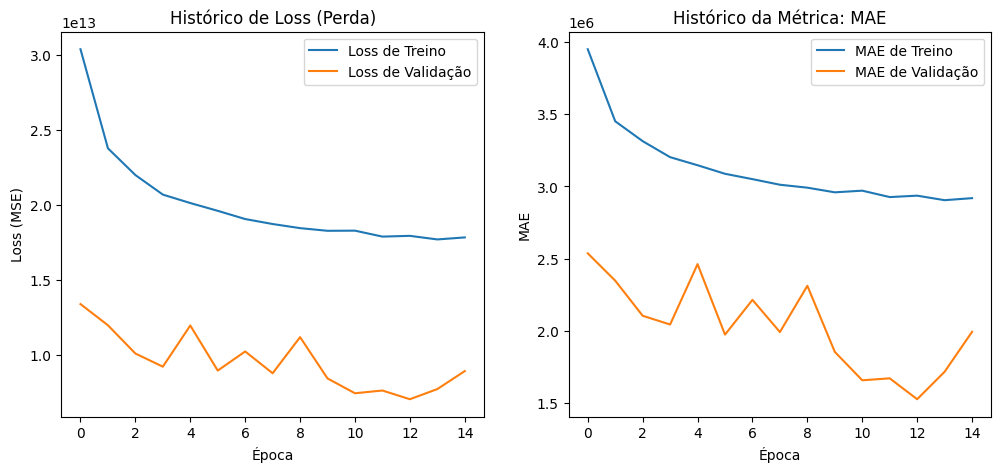

In [53]:
metric_name = 'mae'

# 1. Plotar o Loss (Perda)
plt.figure(figsize=(12, 5))
    
# Gráfico 1: Loss
plt.subplot(1, 2, 1)
plt.plot(history_amount.history['loss'], label='Loss de Treino')
    
if 'val_loss' in history_amount.history:
    plt.plot(history_amount.history['val_loss'], label='Loss de Validação')
    
plt.title('Histórico de Loss (Perda)')
plt.ylabel('Loss (MSE)')
plt.xlabel('Época')
plt.legend()

# 2. Plotar a Métrica
plt.subplot(1, 2, 2)
    
plt.plot(history_amount.history[metric_name], label=f'{metric_name.upper()} de Treino')
    
val_metric_name = f'val_{metric_name}'
if val_metric_name in history_amount.history:
    plt.plot(history_amount.history[val_metric_name], label=f'{metric_name.upper()} de Validação')
        
plt.title(f'Histórico da Métrica: {metric_name.upper()}')
plt.ylabel(f'{metric_name.upper()}')
plt.xlabel('Época')
plt.legend()
    
plt.show()

584/584 [==============================] - 1s 2ms/step


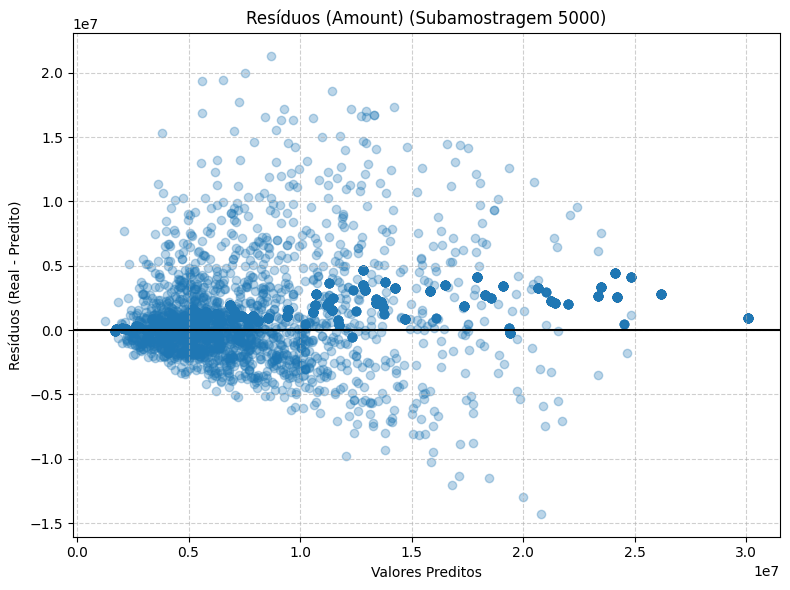

In [54]:

predictions = model_amount.predict(X_test_np) # predictions agora tem forma (n_samples, 1)

res = y_test_np - predictions

N = 5000

sample_size = len(predictions)
idx = np.random.choice(sample_size, size=N, replace=False)

plt.figure(figsize=(8, 6))

plt.scatter(predictions[idx, 0], res[idx], alpha=0.3) 
plt.axhline(0, color='black')
plt.title(f"Resíduos (Amount) (Subamostragem {N})")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos (Real - Predito)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [55]:
FEATURES = ['Carpet Area', 'Floor', 'Transaction', 'Furnishing', 'facing', 'Bathroom', 'Balcony', 'Car Parking', 'Super Area',
            'main_road', 'garden_park', 'pool', 'Total_Floors']

GOALS = ['Price (in rupees)']

# 1. Separar as features (X) dos alvos (y)
X = df[FEATURES]
y = df[GOALS] 

# 2. Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42 # Para reprodutibilidade
)

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

BATCH_SIZE = 32

train_generator = DataGenerator(
    X_data=X_train_np, 
    y_data=y_train_np, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

validation_generator = DataGenerator(
    X_data=X_test_np, 
    y_data=y_test_np, 
    batch_size=BATCH_SIZE, 
    shuffle=False
)

# --- Parâmetros de Decaimento Exponencial ---

INITIAL_LEARNING_RATE = 0.01

STEPS_PER_EPOCH = len(train_generator)
DECAY_STEPS = STEPS_PER_EPOCH

DECAY_RATE = 0.95


lr_schedule = ExponentialDecay(
    initial_learning_rate=INITIAL_LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=DECAY_RATE,
    staircase=False # Define se o decaimento é discreto (passos) ou contínuo
)

# 1. Definir o modelo sequencial
model_rent = Sequential()

model_rent.add(Dense(512, activation='relu', input_shape=(len(FEATURES),))) 
model_rent.add(Dropout(0.2)) 

model_rent.add(Dense(256, activation='relu'))
model_rent.add(Dropout(0.2))

model_rent.add(Dense(128, activation='relu'))
model_rent.add(Dropout(0.2))

model_rent.add(Dense(64, activation='relu'))
model_rent.add(Dropout(0.2))

model_rent.add(Dense(32, activation='relu'))
model_rent.add(Dropout(0.2))

model_rent.add(Dense(16, activation='relu'))
model_rent.add(Dropout(0.2))

model_rent.add(Dense(len(GOALS))) 

model_rent.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse', metrics=['mae'])

# Treinar o modelo
print("\nIniciando o treinamento do modelo...")
history_rent = model_rent.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,  # Número de épocas, ajuste conforme necessário
    verbose=1   # 1 para barra de progresso, 0 para silenciar
)


Iniciando o treinamento do modelo...
Epoch 1/15
2335/2335 [==============================] - 23s 9ms/step - loss: 10087325.0000 - mae: 2399.9084 - val_loss: 6231988.0000 - val_mae: 1837.9326
Epoch 2/15
2335/2335 [==============================] - 23s 10ms/step - loss: 7996045.5000 - mae: 2110.3438 - val_loss: 6219849.0000 - val_mae: 1869.9846
Epoch 3/15
2335/2335 [==============================] - 24s 10ms/step - loss: 7248468.5000 - mae: 2007.7448 - val_loss: 10316198.0000 - val_mae: 2565.5093
Epoch 4/15
2335/2335 [==============================] - 24s 10ms/step - loss: 6884518.0000 - mae: 1945.0460 - val_loss: 4901265.5000 - val_mae: 1643.6031
Epoch 5/15
2335/2335 [==============================] - 23s 10ms/step - loss: 6772181.5000 - mae: 1926.0812 - val_loss: 4599062.5000 - val_mae: 1567.9020
Epoch 6/15
2335/2335 [==============================] - 23s 10ms/step - loss: 6587625.5000 - mae: 1890.2120 - val_loss: 6048444.0000 - val_mae: 1903.3195
Epoch 7/15
2335/2335 [===============

In [56]:
# Avaliar o modelo no conjunto de validação
print("\nAvaliando o modelo no conjunto de validação...")
loss, mae = model_rent.evaluate(validation_generator, verbose=0)
print(f"Perda (MSE) no conjunto de validação: {loss:.4f}")
print(f"Erro Absoluto Médio (MAE) no conjunto de validação: {mae:.4f}")
print(f"Porcentagem do MAE em relação conjunto de validação: {100 * mae / y_test_np.mean():.4f}%")

# Fazer previsões
print("\nFazendo previsões em algumas amostras de teste...")
sample_predictions = model_rent.predict(X_test_np[:10]) # Prever nas primeiras 5 amostras de teste
print("Previsões para as primeiras 10 amostras:")
print(sample_predictions)
print("\nValores reais para as primeiras 10 amostras:")
print(y_test_np[:10])


Avaliando o modelo no conjunto de validação...
Perda (MSE) no conjunto de validação: 4507170.0000
Erro Absoluto Médio (MAE) no conjunto de validação: 1574.7031
Porcentagem do MAE em relação conjunto de validação: 22.2669%

Fazendo previsões em algumas amostras de teste...
1/1 [==============================] - 0s 191ms/step
Previsões para as primeiras 10 amostras:
[[ 6118.4663]
 [ 4577.887 ]
 [ 6260.4844]
 [ 8183.9272]
 [ 4839.1045]
 [ 5898.6377]
 [10335.379 ]
 [ 5782.4727]
 [ 5308.977 ]
 [ 5915.307 ]]

Valores reais para as primeiras 10 amostras:
[[ 6863.]
 [ 5169.]
 [ 8359.]
 [10500.]
 [ 6689.]
 [ 7296.]
 [13108.]
 [ 2941.]
 [ 8680.]
 [ 9091.]]


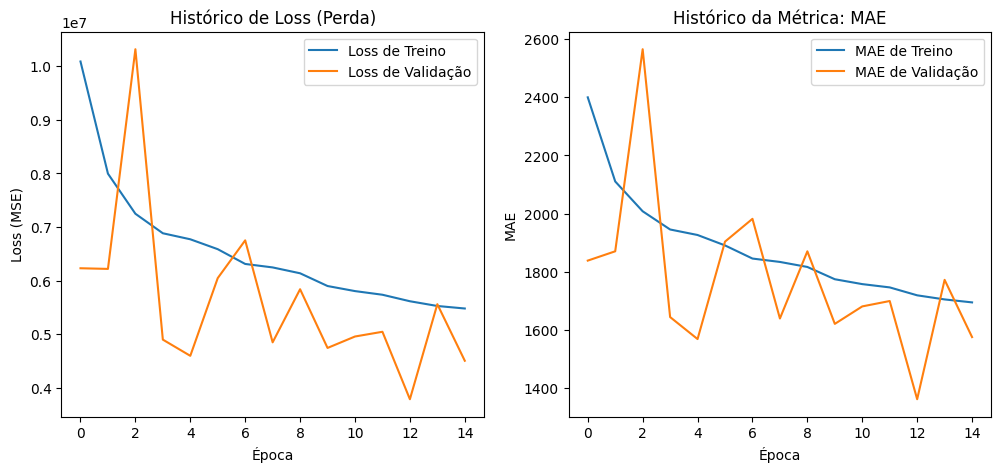

In [57]:
metric_name = 'mae'

# 1. Plotar o Loss (Perda)
plt.figure(figsize=(12, 5))
    
# Gráfico 1: Loss
plt.subplot(1, 2, 1)
plt.plot(history_rent.history['loss'], label='Loss de Treino')
    
if 'val_loss' in history_rent.history:
    plt.plot(history_rent.history['val_loss'], label='Loss de Validação')
    
plt.title('Histórico de Loss (Perda)')
plt.ylabel('Loss (MSE)')
plt.xlabel('Época')
plt.legend()

# 2. Plotar a Métrica
plt.subplot(1, 2, 2)
    
plt.plot(history_rent.history[metric_name], label=f'{metric_name.upper()} de Treino')
    
val_metric_name = f'val_{metric_name}'
if val_metric_name in history_rent.history:
    plt.plot(history_rent.history[val_metric_name], label=f'{metric_name.upper()} de Validação')
        
plt.title(f'Histórico da Métrica: {metric_name.upper()}')
plt.ylabel(f'{metric_name.upper()}')
plt.xlabel('Época')
plt.legend()
    
plt.show()

584/584 [==============================] - 1s 2ms/step


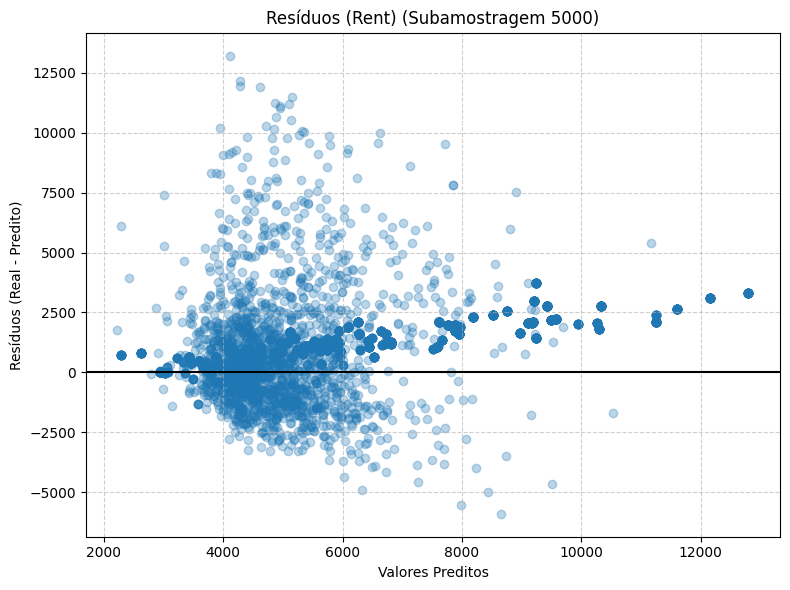

In [58]:

predictions = model_rent.predict(X_test_np) # predictions agora tem forma (n_samples, 1)

res = y_test_np - predictions

N = 5000

sample_size = len(predictions)
idx = np.random.choice(sample_size, size=N, replace=False)

plt.figure(figsize=(8, 6))

plt.scatter(predictions[idx, 0], res[idx], alpha=0.3) 
plt.axhline(0, color='black')
plt.title(f"Resíduos (Rent) (Subamostragem {N})")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos (Real - Predito)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()